<html>
<div style="width:100%">
  <div style="width:90%; float:left; background:white; margin:10px">
    <img style ="width:100%"src ="https://raw.githubusercontent.com/publicunpublic/QCMM_Jupyter/main/full.svg">
    <div style="margin-top:2.5%;position:absolute;background-color:#0e4be5;width:6%;height:0.3%"></div>
  </div>
  </div>

<html>
<center>
<br>
<h1 style="color:#E6610F;"> Analyze scan from  QCScan </h1>
<br><br>
</center>

## Define Variables


In [2]:
import qcportal as ptl

In [3]:
client_address = "152.74.10.245:7778"
username = None
password = None
scan_collection_name = "salen_l-lac_i2--i3_02_b3lyp_def2-svp_35_42"
model_chem = "B3LYP-D3BJ/def2-tzvp-Psi4"

In [4]:
client = ptl.FractalClient(address=client_address, verify=False)

##  A) List structures in the scan collection

In [5]:
ds  = client.get_collection("Dataset", scan_collection_name)
ds.get_entries()

,name,molecule_id
0,3.69,23161
1,3.74,23104
2,3.34,23378
3,3.64,23198
4,3.19,23396
5,3.09,23402
6,3.04,23405
7,3.14,23398
8,3.29,23385
9,3.59,23204


##  B) Compute a different level of theory if necessary 

In [227]:
#c = ds.compute(method = 'pbe0-d3bj', basis = 'def2-tzvp', program = 'psi4', tag='rx_comp')
#print(c)

ComputeResponse(nsubmitted=38 nexisting=0)


In [ ]:
#c.dict()

##  C)  Check the energies of the optimized points

In [6]:
import warnings
warnings.filterwarnings("ignore")

ds.get_values(program='psi4')

None
None
None
None
None


,PBE0/def2-tzvp-Psi4,B3LYP/def2-tzvp-Psi4,PBE0-D3BJ/def2-tzvp-Psi4,B3LYP-D3BJ/def2-tzvp-Psi4
3.69,-1110046.28489,-1111223.044572,-1110093.378391,-1111310.451364
3.74,-1110046.346097,-1111223.146549,-1110093.378333,-1111310.465873
3.34,-1110045.346793,-1111221.612503,-1110093.181024,-1111310.292519
3.64,-1110046.67941,-1111223.057219,-1110094.249485,-1111311.27776
3.19,-1110043.440054,-1111219.392821,-1110092.188052,-1111309.613071
3.09,-1110042.088742,-1111217.800609,-1110091.140436,-1111308.52933
3.04,-1110041.330339,-1111216.933233,-1110090.514129,-1111307.878074
3.14,-1110042.805009,-1111218.638193,-1110091.70681,-1111309.11645
3.29,-1110044.912434,-1111221.083455,-1110093.028223,-1111310.250856
3.59,-1110046.638251,-1111222.986189,-1110094.222025,-1111311.214473


## D)  Plot the scan energy profile 

<IPython.core.display.Javascript object>


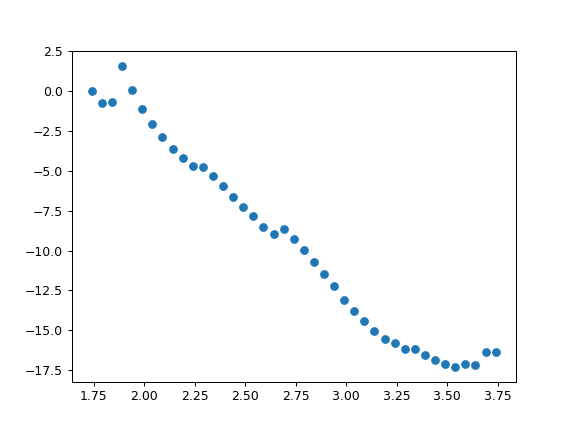

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook


model_chem = model_chem

scan_df = ds.df
scan_df = scan_df[scan_df[model_chem].notnull()]

init_energy = scan_df[model_chem].sort_index().iloc[0]
scan_df['rel_scan_energy'] = scan_df[model_chem] - init_energy
energy = scan_df['rel_scan_energy']
rx_coord =  [float(x) for x in scan_df.index]

plt.scatter(rx_coord, energy)

## E) Save the scan profile in a molden file to visualize 

The file will appear in the folder where you run this notebook with name of the collection followed by 
an `_anim.dat` apendix

In [14]:
opt_mol_id = ds.get_entries().molecule_id
opt_mol = client.query_molecules(list(opt_mol_id))

xyz_str = ''
for m in opt_mol:
    xyz_str += m.to_string("xyz")

filename = ds.name+'_anim.dat'
with open(filename, 'w') as handle:
    handle.write(xyz_str)